# Standard Scaler 

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [11]:
np.random.seed(1)

In [12]:
df = pd.DataFrame(
    {
        'x1':np.random.normal(0,2,10000),
        'x2':np.random.normal(5,3,10000),
        'x3':np.random.normal(-5,5,10000)
    }
)

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
x1    10000 non-null float64
x2    10000 non-null float64
x3    10000 non-null float64
dtypes: float64(3)
memory usage: 234.5 KB


,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [15]:
scaler = preprocessing.StandardScaler()
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_df = scaler.fit_transform(df)
scaled_df

array([[ 1.61653543, -0.13175263, -1.9247574 ],
       [-0.62228462,  0.21847458, -0.14641572],
       [-0.53859835, -0.36131085, -0.82094159],
       ...,
       [-1.02516118,  2.39614871, -0.06951623],
       [-0.07255698,  0.87231272, -1.27409225],
       [-1.44940235, -0.10890221,  0.35836759]])

In [19]:
scaled_df = pd.DataFrame(scaled_df, columns=['x1','x2','x3'])

In [21]:
scaled_df.head()

,x1,x2,x3
0,1.616535,-0.131753,-1.924757
1,-0.622285,0.218475,-0.146416
2,-0.538598,-0.361311,-0.820942
3,-1.084057,-0.838991,-0.192287
4,0.856675,-0.270204,1.045092


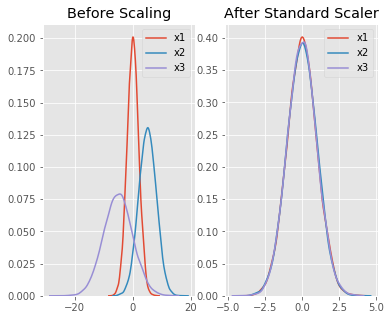

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6,5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

plt.show()


# Min Max Scaler

In [26]:
df = pd.DataFrame({
    # positive scew
    'x1' : np.random.chisquare(8, 1000),
    # negative scew
    'x2' : np.random.beta(8,2,1000) * 40,
    #no skew
    'x3' : np.random.normal(50, 3, 1000)
})

In [27]:
df.head()

,x1,x2,x3
0,8.913396,33.282653,54.509849
1,5.583017,38.986294,52.473472
2,19.713205,26.377055,48.803613
3,23.293714,31.520740,50.593609
4,11.508381,38.646724,49.702286


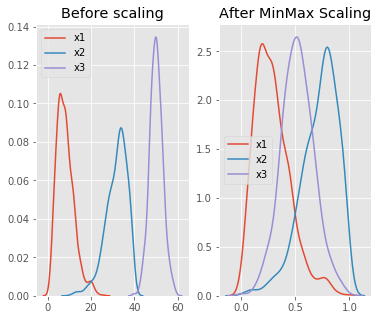

In [30]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2','x3'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
ax2.set_title('After MinMax Scaling')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

plt.show()

# Robust Scaler

In [33]:
x = pd.DataFrame({
    # Distribution with Lower Outliers
    'x1': np.concatenate([np.random.normal(20, 1 ,1000), np.random.normal(1,1,25)]),
    
    # Distribution with Higher Outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)])
    
})

In [35]:
np.random.normal(1, 0.5, 3)

array([0.53327351, 1.43162599, 1.44776142])

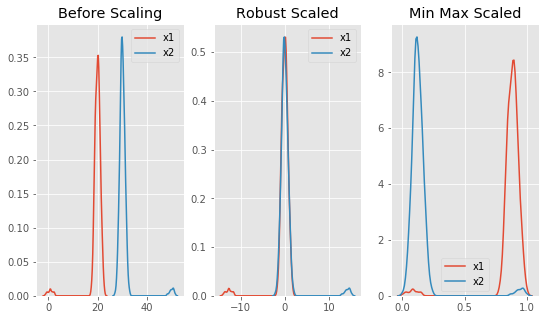

In [39]:
scaler = preprocessing.RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns=['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_scaled_df = scaler.fit_transform(x)
minmax_scaled_df = pd.DataFrame(minmax_scaled_df, columns=['x1','x2'])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,5))

ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax=ax1)
sns.kdeplot(x['x2'], ax=ax1)

ax2.set_title('Robust Scaled')
sns.kdeplot(robust_scaled_df['x1'], ax=ax2)
sns.kdeplot(robust_scaled_df['x2'], ax=ax2)

ax3.set_title('Min Max Scaled')
sns.kdeplot(minmax_scaled_df['x1'], ax=ax3)
sns.kdeplot(minmax_scaled_df['x2'], ax=ax3)

plt.show()

# Nomalizer

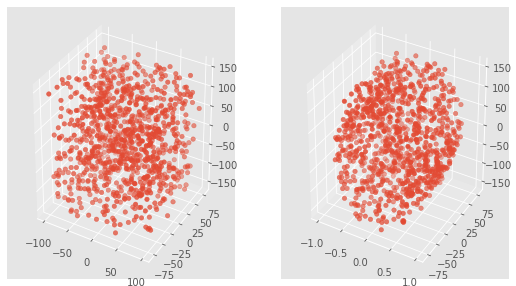

In [42]:
from mpl_toolkits.mplot3d import Axes3D
df=pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

scaler = preprocessing.Normalizer()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

fig = plt.figure(figsize=(9,5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], df['y1'], df['z1'])

plt.show()